<a href="https://colab.research.google.com/github/Otaboyev0727/Amalyotlar/blob/main/DL_Prediction_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
torch.cuda.is_available()

True

In [16]:
import fastai 
fastai.__version__

'2.7.12'

In [17]:
torch.__version__

'2.0.0+cu118'

In [18]:

from fastai.vision.all import *
from ipywidgets import widgets
#data
path=untar_data(URLs.PETS)/'images'

#lebellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi(dataloaders)
dls=ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2,seed=24,
    label_func=is_cat, item_tfms=Resize(224)
)
 
 #o'qitish (train)

learn=cnn_learner(dls, resnet34,metrics=accuracy)
learn.fine_tune(2)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.135424,0.019953,0.994587,00:57


epoch,train_loss,valid_loss,accuracy,time
0,0.065819,0.015347,0.995264,00:58
1,0.030272,0.003182,0.998647,01:00


In [19]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlik ehtimoligi:1.000


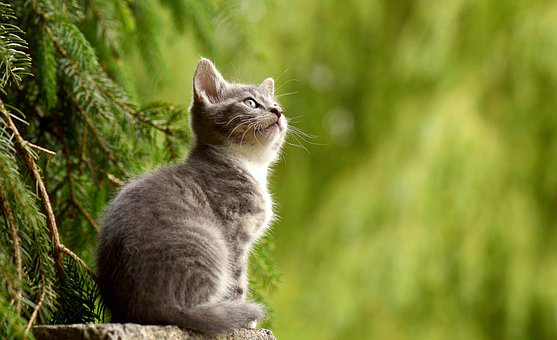

In [22]:
img=PILImage.create(upload.data[-1])
pred, _, prob =learn.predict(img)
print(f'Mushukmi?: {pred}')
print(f'Aniqlik ehtimoligi:{prob[1].item():.3f}')
img